# Explore Data for The Olympics Challenge

Data Included:
- Athlete, Medal, and Event Data
- Nation & Region Lookup

In [1]:
using CSV
using DataFrames
using Chain
using CategoricalArrays
using Dates

using Gadfly

In [2]:
# DataFrames View Settings
ENV["LINES"] = 10
ENV["COLUMNS"] = 999

999

## Load the Data

In [4]:
data_dir = joinpath(pwd(), "data")

# Olympic Nations & Codes
nation_codes = CSV.File(joinpath(data_dir, "Olympic Nations and Region Look-Up.csv")) |> DataFrame

# Athlete/Medal/Event Data
events = CSV.File(joinpath(data_dir, "Olympic Athletes and Events.csv")) |> DataFrame

events

┌ Warning: thread = 1 warning: only found 2 / 3 columns around data row: 231. Filling remaining columns with `missing`
└ @ CSV /Users/ben/.julia/packages/CSV/Zl2ww/src/file.jl:612


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
,Int64,String,String,String,String,String,String,String,String,Int64,String,String,String,String,String
1,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
2,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
3,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
4,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
6,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA
7,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NA
8,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NA
9,5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NA


In [8]:
# sort(unique(events.Year))
# combine(events,
#     :Year => unique
# )

select(
    events,
    :Year => ByRow(Date),
    :Medal => m -> recode(m, "NA" => missing)
)

,Year_Date,Medal_function
,Date,String?
1,1992-01-01,missing
2,2012-01-01,missing
3,1920-01-01,missing
4,1900-01-01,Gold
5,1988-01-01,missing
6,1988-01-01,missing
7,1992-01-01,missing
8,1992-01-01,missing
9,1994-01-01,missing


In [6]:
medals_by_year = @chain filter(r -> r.Medal != "NA", events) begin
    select(_,
        :Year => ByRow(Date),
        # :Medal => m -> recode(m, "NA" => missing),
        :Medal => categorical,
        :Season,
        renamecols=false)
    groupby([:Year, :Medal, :Season])
    combine(nrow)
end

,Year,Medal,Season,nrow
,Date,Cat…,String,Int64
1,1900-01-01,Gold,Summer,201
2,1920-01-01,Bronze,Summer,367
3,2014-01-01,Bronze,Winter,198
4,1948-01-01,Bronze,Summer,279
5,1948-01-01,Gold,Summer,289
6,1952-01-01,Bronze,Summer,300
7,1992-01-01,Gold,Winter,104
8,1992-01-01,Bronze,Winter,106
9,1994-01-01,Silver,Winter,109


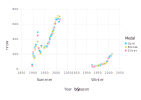

In [9]:
p1 = Gadfly.plot(
    # filter(x -> x.Season == "Winter", medals_by_year),
    medals_by_year,
    x = :Year, y = :nrow,
    color = :Medal,
    xgroup = :Season,
    Geom.subplot_grid(Geom.point)
)

In [10]:
filter(x -> x.Season == "Winter", medals_by_year)

,Year,Medal,Season,nrow
,Date,Cat…,String,Int64
1,2014-01-01,Bronze,Winter,198
2,1992-01-01,Gold,Winter,104
3,1992-01-01,Bronze,Winter,106
4,1994-01-01,Silver,Winter,109
5,1994-01-01,Bronze,Winter,112
6,2002-01-01,Gold,Winter,162
7,2006-01-01,Gold,Winter,176
8,1952-01-01,Bronze,Winter,47
9,1960-01-01,Gold,Winter,50


---
## Sanbox

In [111]:
using Gadfly, Colors, RDatasets, Random
set_default_plot_size(14cm, 8cm)
Random.seed!(1234)

function gen_colors(n)
    cs = distinguishable_colors(n,
                                [colorant"#FE4365", colorant"#eca25c"],
                                lchoices = Float64[58, 45, 72.5, 90],
                                transform = c -> deuteranopic(c, 0.1),
                                cchoices = Float64[20,40],
                                hchoices = [75,51,35,120,180,210,270,310])

    convert(Vector{Color}, cs)
end

gen_colors (generic function with 1 method)

In [11]:
[colorant"#FE4365", colorant"#eca25c"]

In [108]:
# import Pkg; Pkg.add("Colors")